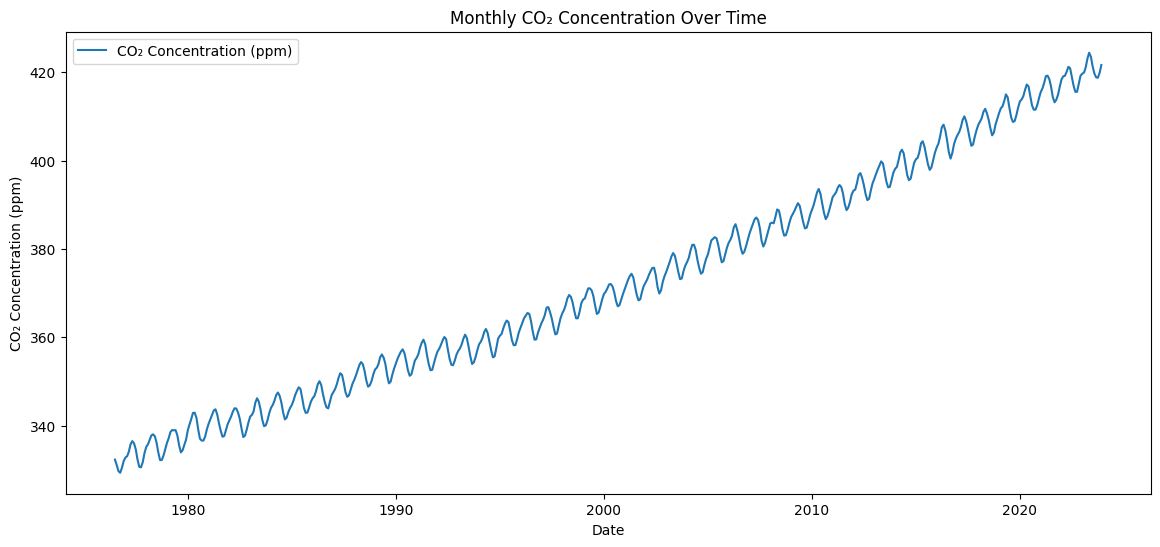

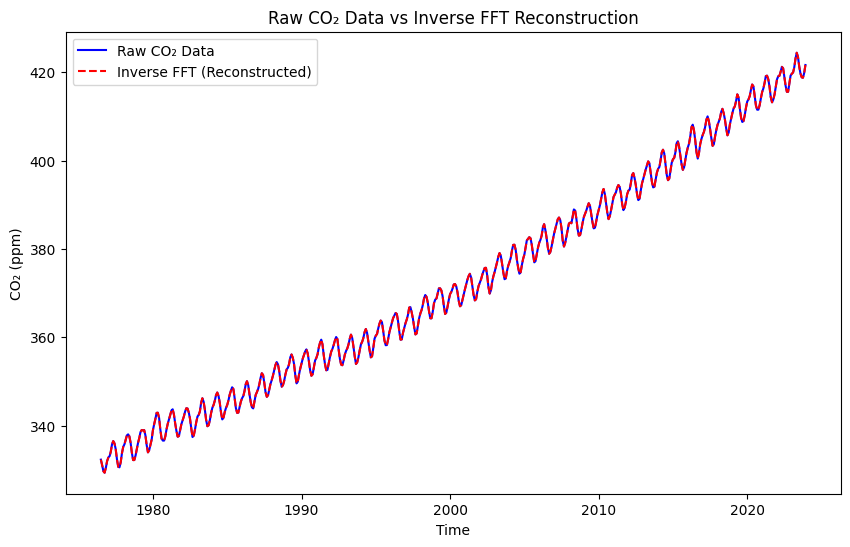

In [6]:
"""
data_presentation.ipynb
This notebook analyzes and visualizes CO₂ data using FFT-based techniques from preparation.py module.
"""

# Importing necessary libraries and the preparation module
import preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CO₂ data
file_path = 'mauna-loa-data/flask_monthly.json'
co2_series = preparation.get_timeseries(file_path)

# # Clean the data by dropping missing values
# co2_series = co2_series.dropna()
# co2_series = co2_series[co2_series > 0]

# Plot the CO₂ time series data
plt.figure(figsize=(14, 6))
plt.plot(co2_series, label='CO₂ Concentration (ppm)')
plt.xlabel('Date')
plt.ylabel('CO₂ Concentration (ppm)')
plt.title('Monthly CO₂ Concentration Over Time')
plt.legend()
plt.show()

# Resample co2_series to enforce a monthly frequency (start of each month)
co2_series = co2_series.asfreq('MS').ffill()  # Forward-fill any gaps, if present

# Perform FFT and take only the half magnitude spectrum value
fft_values = preparation.fft_mag(co2_series)

if fft_values is None:
    print("FFT could not be computed due to missing or unevenly spaced data.")
else:
    # Perform inverse FFT to reconstruct the time-domain signal
    reconstructed_series = preparation.inv_fft(fft_values)

    # Plot 2: Raw Data vs Inverse FFT Reconstruction
    plt.figure(figsize=(10, 6))
    plt.plot(co2_series.index, co2_series, label="Raw CO₂ Data", color="blue")
    plt.plot(co2_series.index, reconstructed_series, label="Inverse FFT (Reconstructed)", color="red", linestyle="--")
    plt.xlabel("Time")
    plt.ylabel("CO₂ (ppm)")
    plt.title("Raw CO₂ Data vs Inverse FFT Reconstruction")
    plt.legend()

    plt.show()